# Ford GoBike Analysis

## Table of Contents
- [Introduction](#intro)
- [Part I - Data Gathering](#gather)
- [Part II - Data Cleaning](#clean)
    - [Final Clean File Export](#final)
- [Part III - Univariate Exploration](#uni)
- [Part IV - Bivariate Exploration](#bi)
- [Part V - Multivariate Exploration](#multi)

***

***

<a id='intro'></a>
## Introduction

This project begins with 12 csv files, each with Ford GoBike data for each month in 2019. With the data, a variety of analyses will be conducted including univariate, bivariate, and multivariate.

Skills employed include:

- Data acquisition
- Data cleaning
- Geopandas
- Statistical analysis
- Univariate and multivariate visualizations

**Formatting Note:** Most of the visualizations in this notebook are not clean (i.e. do not contain labeled axis, etc.) as they are serving as a cursory exploration of the data. Fully documented visualizations are available in the accompanying slide_deck notebook. 

*Imports*

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import calendar
import time

print("Imports complete.")

Imports complete.


***

***

<a id='gather'></a>
## Data Gathering

Data was collected from the [Ford GoBike Data Page](https://www.fordgobike.com/system-data) (now part of Lyft services). Trip history data from all months of 2019 was downloaded. According to the data providers, each trip entry includes: 

- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

First, the 12 data files must be uploaded and concatenated into one master file. 

In [5]:
jan = pd.read_csv("201901-fordgobike-tripdata.csv")
feb = pd.read_csv("201902-fordgobike-tripdata.csv")
mar = pd.read_csv("201903-fordgobike-tripdata.csv")
apr = pd.read_csv("201904-fordgobike-tripdata.csv")
may = pd.read_csv("201905-baywheels-tripdata.csv") # company name changed here
jun = pd.read_csv("201906-baywheels-tripdata.csv")
jul = pd.read_csv("201907-baywheels-tripdata.csv")
aug = pd.read_csv("201908-baywheels-tripdata.csv")
sep = pd.read_csv("201909-baywheels-tripdata.csv")
octo = pd.read_csv("201910-baywheels-tripdata.csv") # oct is already assigned
nov = pd.read_csv("201911-baywheels-tripdata.csv")
dec = pd.read_csv("201912-baywheels-tripdata.csv")

/Users/mehrnazsiavoshi/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/mehrnazsiavoshi/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/mehrnazsiavoshi/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [54]:
bike_data = pd.concat([jan, feb, mar, apr, may, jun, jul, aug, sep, octo, nov, dec])
bike_data.shape

(2506983, 15)

Based on the shape, we see that the dataframes were correctly merged into one large dataframe containing all the data from 2019. 

***

***

<a id='clean'></a>
## Data Cleaning

Next, we should look for any parts of the dataset that need to be fixed. None are expected as the source is assumed to be clean, however some light checks will be performed. 

In [59]:
# Checking for null values

bike_data.isnull().sum()

duration_sec                     0
start_time                       0
end_time                         0
start_station_id             80734
start_station_name           80133
start_station_latitude           0
start_station_longitude          0
end_station_id               82902
end_station_name             82350
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
bike_share_for_all_trip     243259
rental_access_method       2386145
dtype: int64

From here, we can see that we are missing some station data. However, we do have latitude and longitude for all trips, so it may be that some stations are not named. 

In [65]:
missing_station = bike_data[bike_data.start_station_id.isnull()]
missing_station.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
2023,746,2019-01-31 18:21:27.0020,2019-01-31 18:33:53.0870,NaN,NaN,37.40,-121.92,NaN,NaN,37.41,-121.94,4244,Subscriber,No,NaN
2533,278,2019-01-31 18:00:28.2040,2019-01-31 18:05:07.0900,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.94,4249,Subscriber,Yes,NaN
3089,830,2019-01-31 17:23:59.3410,2019-01-31 17:37:50.0250,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.93,4208,Subscriber,No,NaN
5264,562,2019-01-31 13:29:18.5250,2019-01-31 13:38:41.0210,NaN,NaN,37.40,-121.93,NaN,NaN,37.39,-121.93,4208,Subscriber,No,NaN
5833,1676,2019-01-31 11:36:57.0450,2019-01-31 12:04:53.5010,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.94,4251,Customer,No,NaN


In [68]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2506983 entries, 0 to 150101
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
 14  rental_access_method     object 
dtypes: float64(6), int64(2), object(7)
memory usage: 306.0+ MB


Most of the data types match what is expected, but start and end time should be converted to timestamps.

It is also challenging to conceptualize how long a trip is when it is measured in seconds, so a new column for trip length in minutes will be constructed. 

The trip start time will also be divided into start month, day, and hour. 

In [261]:
bike_data['start_time'] = pd.to_datetime(bike_data.start_time)
bike_data['end_time'] = pd.to_datetime(bike_data.end_time)
bike_data['minutes'] = bike_data.duration_sec / 60.

daymap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
bike_data['day'] = bike_data.start_time.apply(lambda time: time.dayofweek).map(daymap)

monmap = {1: 'Jan', 2: 'Feb',3: 'Mar',4: 'Apr',5: 'May',6: 'Jun',7: 'Jul',8: 'Aug',9: 'Sep',10: 'Oct',11: 'Nov',12: 'Dec',}
bike_data['month'] = bike_data.start_time.apply(lambda time: time.month).map(monmap)

bike_data['month_num'] = bike_data.start_time.apply(lambda time: time.month)
bike_data['day_num'] = bike_data.start_time.apply(lambda time: time.dayofweek)


bike_data['hour'] = bike_data.start_time.dt.hour

bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2506983 entries, 0 to 150101
Data columns (total 22 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         float64       
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           float64       
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  int64         
 12  user_type                object        
 13  bike_share_for_all_trip  object        
 14  rental_access_method     object        
 15  minutes                  float64       
 16  day                      object        
 17  month                    obj

In [90]:
bike_data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,minutes,hour
count,2.506983e+06,2.426249e+06,2.506983e+06,2.506983e+06,2.424081e+06,2.506983e+06,2.506983e+06,2.506983e+06,2.506983e+06,2.506983e+06
mean,8.076483e+02,1.465047e+02,3.776506e+01,-1.223499e+02,1.427044e+02,3.776422e+01,-1.223459e+02,2.789833e+04,1.346081e+01,1.352904e+01
std,1.974714e+03,1.223171e+02,1.363698e-01,3.089648e-01,1.214296e+02,2.392885e-01,7.080417e-01,1.146067e+05,3.291190e+01,4.804546e+00
min,6.000000e+01,3.000000e+00,0.000000e+00,-1.225143e+02,3.000000e+00,0.000000e+00,-1.225143e+02,4.000000e+00,1.000000e+00,0.000000e+00
25%,3.590000e+02,4.700000e+01,3.776931e+01,-1.224130e+02,4.300000e+01,3.777003e+01,-1.224117e+02,1.952000e+03,5.983333e+00,9.000000e+00
50%,5.710000e+02,1.050000e+02,3.778053e+01,-1.223983e+02,1.010000e+02,3.778076e+01,-1.223981e+02,4.420000e+03,9.516667e+00,1.400000e+01
75%,8.870000e+02,2.430000e+02,3.779539e+01,-1.222914e+02,2.390000e+02,3.779587e+01,-1.222934e+02,9.682000e+03,1.478333e+01,1.700000e+01
max,9.121100e+05,4.980000e+02,4.551000e+01,0.000000e+00,4.980000e+02,4.551000e+01,0.000000e+00,9.999410e+05,1.520183e+04,2.300000e+01


In [91]:
bike_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,minutes,day,month,hour
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,NaN,1347.083333,Thu,Jan,17
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,NaN,1098.333333,Thu,Jan,20
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,NaN,1043.883333,Thu,Jan,18
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,NaN,744.666667,Thu,Jan,19
4,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,NaN,1011.816667,Thu,Jan,14


### What is the structure of your dataset?

There are 2,506,983 observations in this dataset with (after cleaning) 22 features. Trip duration, starting and ending stations, bike ID, and some user data is collected for each trip. Some trip station data is missing, but this will not affect the overall analysis. 


### What is/are the main feature(s) of interest in your dataset?

The main feature of interest in the dataset is the trip length, as well as the number of trips for different conditions (i.e. day of the week). 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The most important variables in this dataset are: duration, user type and date. Other variables will also be considered for different analyses. 

***

<a id='final'></a>
### Final Clean Data Export

The following blocks are included to streamline the process if the notebook needs to be rerun by skipping the above merging and cleaning steps. 

Uncomment the first block to save the cleaned datafile. Uncomment the second block to reload the clean datafile. 

In [262]:
# bike_data_master = bike_data

# bike_data_master.to_csv("bike_data_master.csv")

In [308]:
# bike_data_master = pd.read_csv("bike_data_master.csv")

/Users/mehrnazsiavoshi/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [309]:
# bike_data_master.shape #(2506983, 23)

(2506983, 23)

**Before continuing, please make sure the bike_data_master dataframe is loaded with either of the two code blocks above.**

***

***

<a id='uni'></a>
## Univariate Exploration

Univariate exploration involves looking at trends in one variable at a time. In this section, the following will be explored:

- {x} Trips by month.
- {x} Top 10 starting stations.
- {x} Starting station geographic density.
- {x} Trips by length. 
- {x} Trips by day of the week. 
- {x} Trips by time of day. 
- {x} Bike ID. 

#### Trips by month

In [99]:
bike_data_master.month.value_counts()

Jul    258102
Mar    256299
Oct    239895
Apr    239111
Sep    217986
Aug    210563
Jan    192082
Jun    191772
Nov    185496
Feb    183412
May    182163
Dec    150102
Name: month, dtype: int64

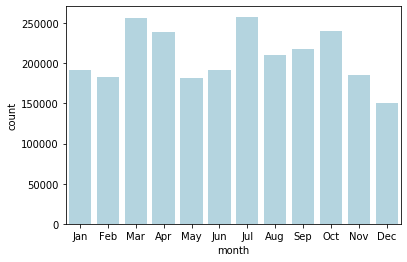

In [98]:
sb.countplot(data=bike_data_master, x='month', color='lightblue')

We see that July, March, October, and April have the highest usage. This is slightly unexpected because tourism typically spikes in summer, but June and August have relatively low usage. Additionally, there are more rainy days in spring (March/April). 

#### Top 10 starting stations

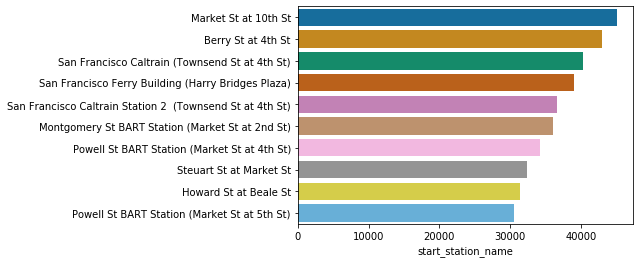

In [139]:
stations = bike_data_master.start_station_name.value_counts().nlargest(10)

sb.barplot(y=stations.index, x=stations, palette="colorblind")


These are the top 10 busiest stations. We see that the most active stations had well over 30,000 riders in all of 2019. 

#### Starting station geographic density within San Fransisco. 

First, a new dataset needs to be created that only contains data for stations within San Fransisco. 

In [184]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

print("Imports complete.")

Imports complete.


In [175]:
geography = bike_data_master

geography = geography[geography.start_station_latitude.between(37.58, 37.86)]
geography = geography[geography.start_station_longitude.between(-122.55, -122.34)]

geography.shape

(1852943, 20)

In [176]:
geography['geometry'] = geography.apply(lambda row: Point(row['start_station_longitude'], row['start_station_latitude']), axis=1)
geography.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,minutes,day,month,hour,geometry
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,NaN,1098.333333,Thu,Jan,20,POINT (-122.4089150084 37.7858806269)
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,NaN,744.666667,Thu,Jan,19,POINT (-122.4291557 37.7700831)
4,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,NaN,1011.816667,Thu,Jan,14,POINT (-122.39443 37.79413)
6,1188,2019-01-31 23:54:38.901,2019-02-01 00:14:27.900,34.0,Father Alfred E Boeddeker Park,37.783988,-122.412408,146.0,30th St at San Jose Ave,37.742314,-122.423180,5114,Subscriber,No,NaN,19.800000,Thu,Jan,23,POINT (-122.412408 37.78398789999999)
8,3153,2019-01-31 23:17:05.462,2019-02-01 00:09:39.457,29.0,O'Farrell St at Divisadero St,37.782405,-122.439446,70.0,Central Ave at Fell St,37.773311,-122.444293,4813,Subscriber,No,NaN,52.550000,Thu,Jan,23,POINT (-122.4394458532 37.7824046019)


In [177]:
geo_data = gpd.GeoDataFrame(geography, geometry='geometry')

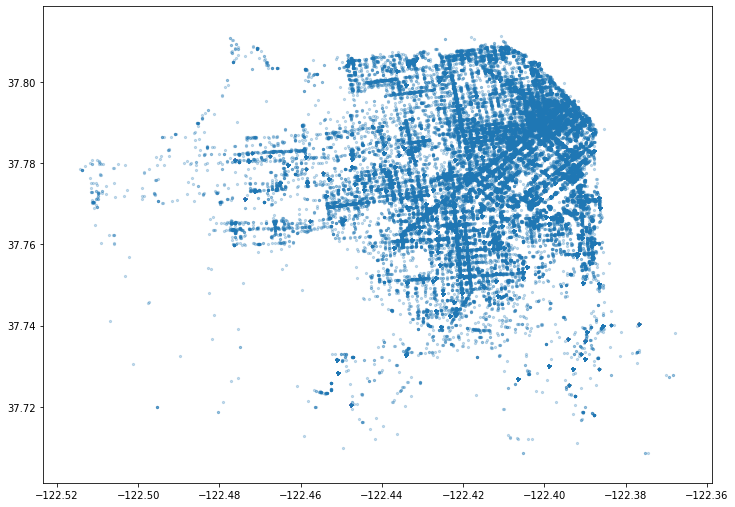

In [178]:
geo_data['geometry'].plot(figsize=(12,10), marker='o', markersize=5, alpha=0.25)
plt.show()

In [153]:
sf = gpd.read_file('sf_map.geojson')
sf.crs = {'init': 'epsg:4326'}
sf = sf.set_geometry('geometry')
sf.head()

,shape_area,nhood,tractce10,geoid,shape_len,geometry
0,3326589.16121,Hayes Valley,016400,06075016400,7589.67939621,"MULTIPOLYGON (((-122.43247 37.77376, -122.4341..."
1,3970258.84056,Western Addition,016100,06075016100,8525.8087554,"MULTIPOLYGON (((-122.42354 37.77967, -122.4234..."
2,3179072.0728,Western Addition,015900,06075015900,8000.96661904,"MULTIPOLYGON (((-122.42469 37.78534, -122.4244..."
3,3364564.73418,Japantown,015500,06075015500,12144.0167608,"MULTIPOLYGON (((-122.42469 37.78534, -122.4249..."
4,2515362.5151,Pacific Heights,015300,06075015300,6918.26802571,"MULTIPOLYGON (((-122.43492 37.78588, -122.4365..."


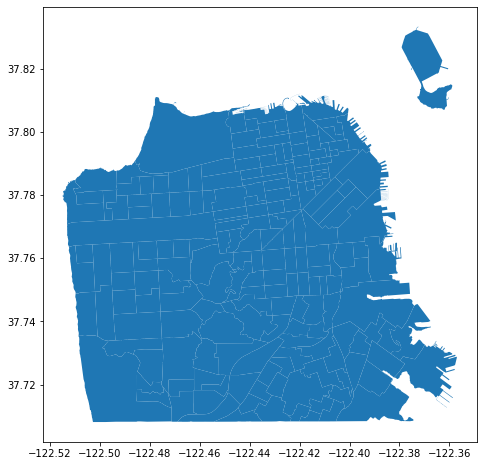

In [154]:
sf['geometry'].plot(figsize=(8,8))
plt.show()

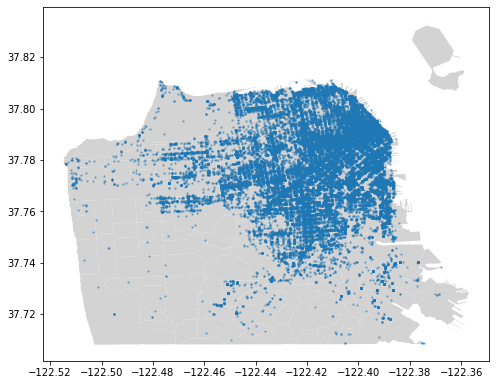

In [181]:
fig, ax = plt.subplots(1, figsize = (8,8))
sf_map = sf['geometry'].plot(ax=ax, color = 'lightgray')
geo_data.plot(ax=sf_map, marker = 'o', markersize = 2, alpha = 0.4)
plt.show()

From the map, we clearly see a high density of stations in the downtown San Fransisco area where both the population is higher, and there are likely to be more tourists. 

#### Trips by length. 

Simply doing a log scale histogram is not very informative as it looks like many rentals are well over a day long. Trips under 3 hours and under 1 hour are graphed separately. 

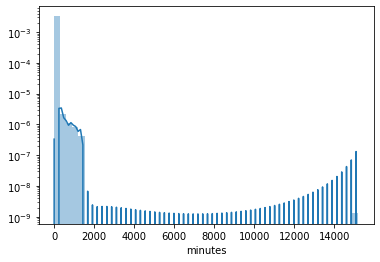

In [195]:
ax = sb.distplot(bike_data_master.minutes)
ax.set_yscale('log')
#sb.countplot(data=bike_data_master, x='month', color='lightblue')

In [199]:
medium_trip = bike_data_master[bike_data_master.minutes.between(0, 180)]

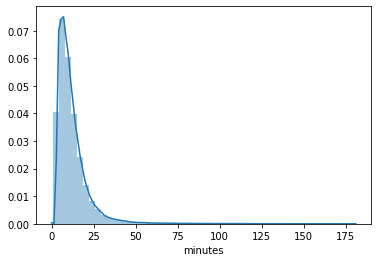

In [200]:
ax = sb.distplot(medium_trip.minutes)

In [267]:
short_trip = bike_data_master[bike_data_master.minutes.between(0, 60)]

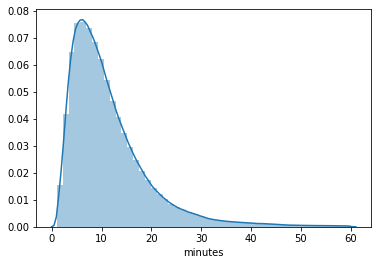

In [203]:
ax = sb.distplot(short_trip.minutes)

With all three histograms taken together, we see that the vast majority of trips are under 20 minutes long. 

#### Trips by day of the week

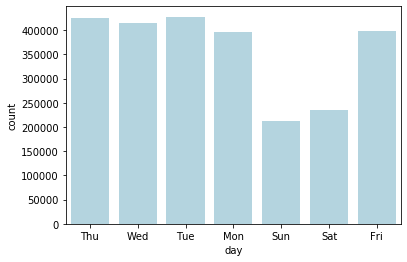

In [205]:
sb.countplot(data=bike_data_master, x='day', color='lightblue')

Interestingly, we see that most trips occur during the week instead of on weekends. This suggests that most trips are for work commutes instead of for leisure. This correlates with previous data showing that trips do not increase significantly over summer, which would be expected if most riders were tourists.  

#### Trips by time of day

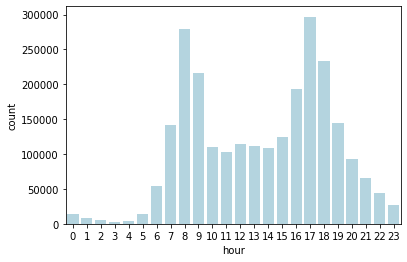

In [207]:
sb.countplot(data=bike_data_master, x='hour', color='lightblue')

As expected, there are very few rides during the night. However, according to the bimodal graph, the vast majority of trips occur around 8-9 am and around 5-6 pm. This also correlates with previous findings that most rides are likely commutes as these are typical commute times. 

#### Bike ID analysis

As an interesting fact, we can also see which bikes are used most often.

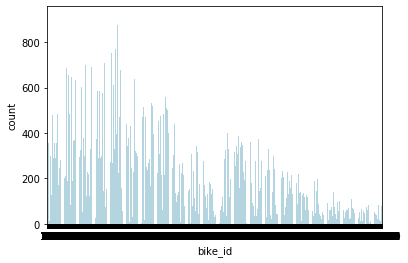

In [213]:
sb.countplot(data=bike_data_master, x='bike_id', color='lightblue')

From the bar graph, we can see that some bikes are used much more frequently than others. From value_counts, we can see that 11,070 bikes were used in 2019. 

A "high use" bike here is considered a bike that was used, on average, more than once per day (366 times). 

In [242]:
bike_count = bike_data_master.bike_id.value_counts()

medium_bike_count = bike_count[bike_count>366]
medium_bike_count = pd.DataFrame(medium_bike_count)
medium_bike_count

,bike_id
3135,912
3146,911
3569,889
3249,882
1502,882
...,...
1991,367
10448,367
1126,367
3565,367


In [243]:
high_bike_count = bike_count[bike_count>731]
high_bike_count = pd.DataFrame(high_bike_count)
high_bike_count

,bike_id
3135,912
3146,911
3569,889
3249,882
1502,882
...,...
2018,733
2821,733
2564,733
757,732


Therefore, we see that 2,145 bikes were used, on average, more than once per day (at least 366 times in a year) and that 153 bikes were used, on average, more than twice a day. 


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

When considering when trips were taken, there were some clear peaks in specific months. However, there was no easy explanation as to why, for example, there was a peak in March and October. 

Trips by time of day followed a bimodal distribution with clear spikes during common commute times. This suggests that most of the usage of these bikes is for commuters. 

Trips by day of the week had a constant distribution during the week with a dropoff on the weekend, also supporting this conclusion. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?


It was discovered that when looking at trip length, there were a lot of very long outliers. The vast majority of trips were under 1 hour long, so these trips were separated into a new dataset for visualization and later analysis. 


***

***

<a id='bi'></a>
## Bivariate Exploration

Bivariate explorations look at whether two variables are correlated. In this section, the following will be explored:

- {x} The day of week and trip duration. 
- {x} The day of the week and trip start time. 
- {x} The trip duration and subscriber status. 


**Note:** For all analyses that use trip time, the short_trip dataset will be used. This dataset only contains trips 60 minutes or shorter, which encompasses the vast majority of trips without including the effect of significant outliers. 

#### Average trip duration per day of week

In [277]:
trip_per_day = short_trip.groupby(['day']).mean()
trip_per_day

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,minutes,hour,month_num,day_num
day,,,,,,,,,,,,
Fri,677.973009,143.885261,37.766853,-122.352252,138.915220,37.766837,-122.350428,26541.255597,11.299550,13.339299,6.391273,4.0
Mon,662.862473,141.598230,37.765858,-122.352057,137.166747,37.765954,-122.351270,29001.760706,11.047708,13.436732,6.552955,0.0
Sat,806.782239,165.357584,37.759139,-122.337649,163.226387,37.759999,-122.339585,36068.846414,13.446371,14.010402,6.373728,5.0
Sun,801.424058,166.353271,37.759554,-122.342823,165.137853,37.758382,-122.338482,36474.859898,13.357068,13.987486,6.415688,6.0
Thu,659.716599,141.951778,37.766205,-122.351238,137.273755,37.765754,-122.348378,22037.006761,10.995277,13.499200,6.258796,3.0
Tue,655.173727,141.381509,37.766302,-122.352046,136.658871,37.765369,-122.347701,28776.699699,10.919562,13.381481,6.482909,1.0
Wed,656.744095,141.384498,37.765952,-122.351593,136.727059,37.765836,-122.349857,23792.192102,10.945735,13.477492,6.316339,2.0


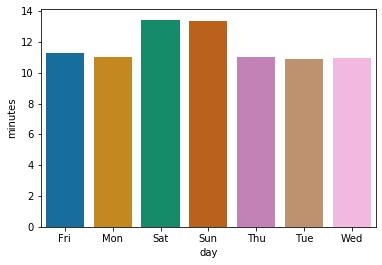

In [294]:
sb.barplot(x=trip_per_day.index, y=trip_per_day.minutes, palette = 'colorblind')



Interestingly, while there are more rides during the week, rides are typically longer on weekends. This hints that weekend rides tend to be for lesiure. 

#### Day of week and start time

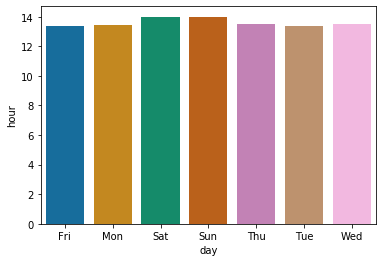

In [336]:
day_av_time = bike_data_master.groupby('day').mean()
sb.barplot(x=day_av_time.index, y=day_av_time.hour, palette='colorblind')

We see that, on average, most trips are in the afternoon with Saturday and Sunday having more afternoon trips. 

#### Trip duration and subscriber status

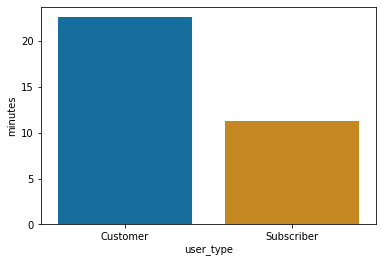

In [332]:
sub_type = bike_data_master.groupby('user_type').mean()

sb.barplot(x=sub_type.index, y=sub_type.minutes, palette='colorblind')

Therefore, we see that customers tend to have longer trips (over twice as long) than subscribers. 


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

In the previous section, we learned that that more trips occurred during the week than on weekends. However, here, we learned that longer trips tend to occur on the weekends. This suggests that commutes tend to be shorter than leisure bike rides. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Interestingly, we also determined that customers tend to have longer bike rides than subscribers. This correlates nicely with the longer average trip time on weekends as customers tend to not be primary commuters.



***

***

<a id='multi'></a>
## Multivariate Exploration

Multivariate exploration considers more than 2 variables to determine trends. In this section, the following will be explored:    

- {x} Interaction between trip hour, day, month and length. 
- {x} Trips by day of week and month.
- {x} Trips by hour and day of the week. 
- {x} Trips by day of week for different subscriber statuses.
- {x} Interaction between trip hour and subscriber status. 

#### Trip hour, day, month, and length

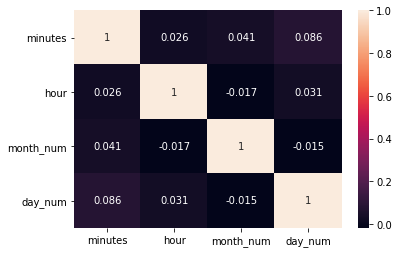

In [268]:
sb.heatmap(short_trip[['minutes', 'hour', 'month_num', 'day_num']].corr(), annot=True)

There isn't much of a correlation between the time of the trip, the date of the trip, and its length. 

#### Trip count by day of week and month

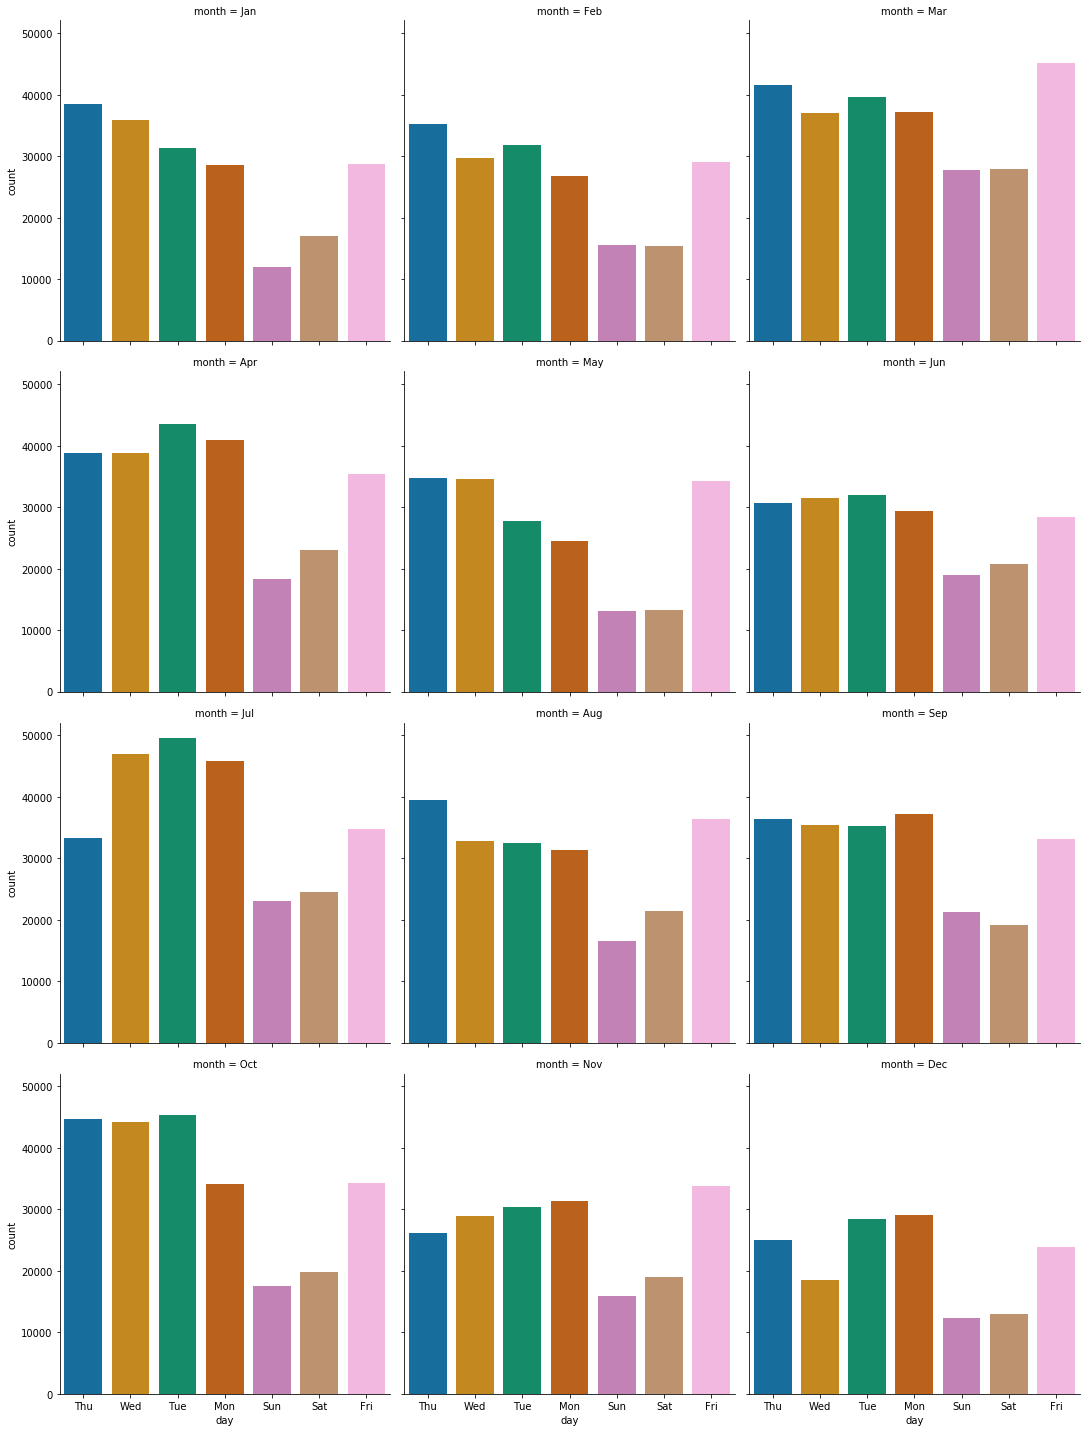

In [317]:
sb.catplot(data=bike_data_master, x='day', col='month', kind='count', col_wrap=3, palette = 'colorblind')

Trends tend to match the aggregate data. Interestingly, rates fall midweek in December, probably because in 2019 Christmas fell on a wednesday. It is interesting, however, that midweek trips rose in July.

#### Trips by hour and day of the week

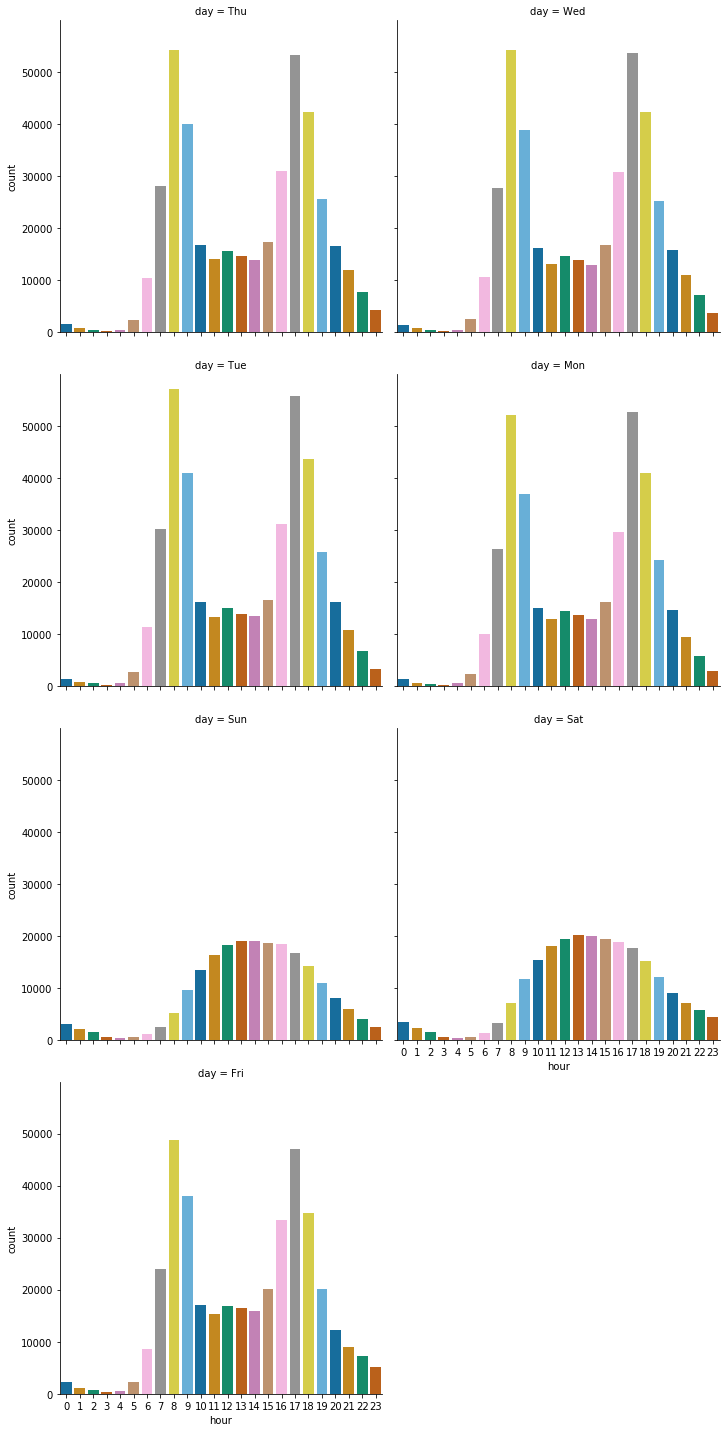

In [338]:
sb.catplot(data=bike_data_master, x='hour', col='day', kind='count', col_wrap=2, palette = 'colorblind')

Workdays, as expected, have a bimodal graph. Weekends do not have this shape and have more of a normal shape with most rides occuring midday. Interestingly, Friday evening is not particularly different from other weekdays. 

#### Trips by day of week for different subscriber statuses

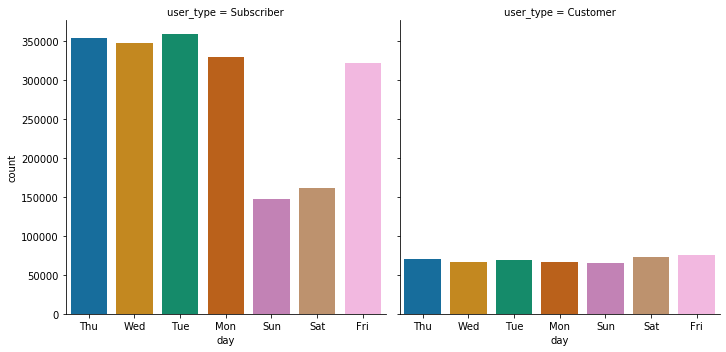

In [321]:
sb.catplot(data=bike_data_master, x='day', col='user_type', kind='count', palette='colorblind')

As expected, we see that subscribers tend to use bikes more during the week. Those who are subscribers will typically use the bikes for their commute. Customers, on the other hand, tend to be tourists and have a steady bike usage rate over the week. 

#### Trip hourly usage by subscriber status

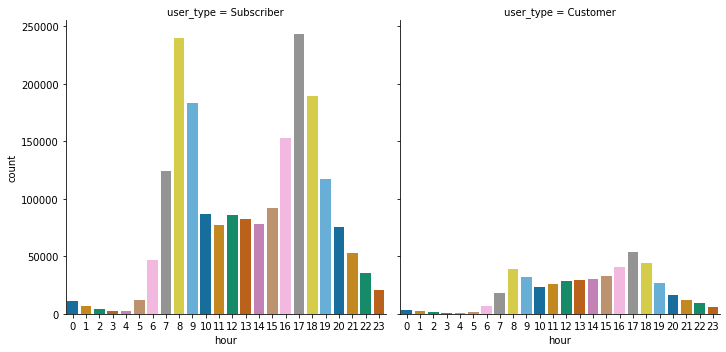

In [322]:
sb.catplot(data=bike_data_master, x='hour', col='user_type', kind='count', palette = 'colorblind')

In concordance with the previous plots, we see that typical usage from the aggregate data more closely matches with the subscribers who tend to have large usage spikes during commute times. Customers, who are typically tourists, have most of their usage in the afternoon. Interestingly, though, customers still have the bivariate shape with the same peaks as the subscribers. This indicates that, perhaps, some of the customers are occasional bike commuters or are trying the service for their commute before subscribing. 



### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

In this section, the interaction of multiple variables was considered. In agreement with previous results, we see that subscribers (at this point assumed to be primarily commuters) have significantly more trips during the week than customers, who have a uniform distribution throughout the week. 

### Were there any interesting or surprising interactions between features?

Interestingly, there was no correlation between when a trip was taken and its length. This may be due to the effect of such a large number of very short trips (under 10 minutes) that seem to be uniformly distributed across all days and times. 

The difference between the number of trips per hour for subscribers and customers is striking. While both have a bimodal shape with peaks occurring at commute times, the customer bar graph is much more uniform in shape. 


***

***

## End